# Programming

## Install Packages

In [9]:
!pip install --upgrade pip
!pip install pandas
!pip install scipy
!pip install sklearn
!pip install scikit-learn
!pip install matplotlib
!pip install --force-reinstall https://github.com/mwaskom/seaborn/archive/refs/heads/master.tar.gz

  Using cached https://github.com/mwaskom/seaborn/archive/refs/heads/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for numpy!=1.24.0,>=1.20 from https://files.pythonhosted.org/packages/9b/5a/f265a1ba3641d16b5480a217a6aed08cceef09cd173b568cd5351053472a/numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Obtaining dependency information for pandas>=1.2 from https://files.pythonhosted.org/packages/2f/0e/3b74e8f7c908082793adafb02753477f653ccd7e189f3ba070757d2d0e65/pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://f

### Import File

In [11]:
from scipy.io.arff import loadarff
import pandas as pd

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


### 1) discriminative power
Apply f_classif from sklearn to assess the discriminative power of the input variables.  
Identify the input variable with the highest and lowest discriminative power.  
Plot the class-conditional probability density functions of these two input variables.

In [12]:
# Some of the sklearn facilities require input data to be separated from output data
X = df.drop('class', axis=1)
y = df['class']

Feature with Highest Discriminative Power:
degree_spondylolisthesis

Feature with Lowest Discriminative Power:
pelvic_radius


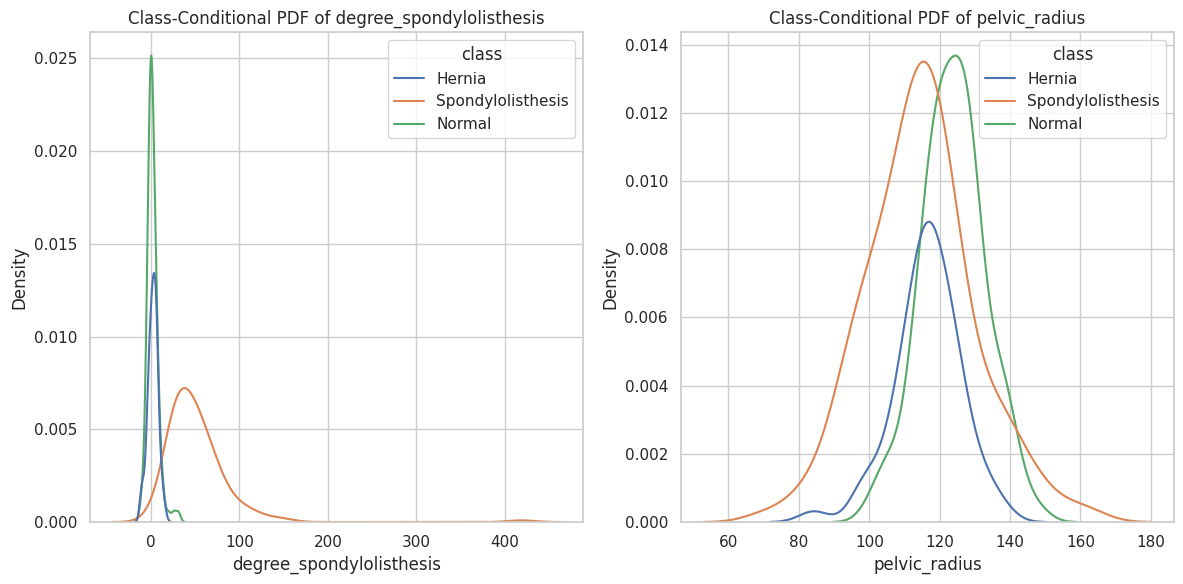

In [17]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

fimportance = f_classif(X, y)

# print('features', X.columns.values)
# print('scores', fimportance[0])
# print('pvalues', fimportance[1])

# sort 
results_df = pd.DataFrame({'Feature': X.columns.values, 'F-Score': fimportance[0], 'p-value': fimportance[1]})
results_df = results_df.sort_values(by='F-Score', ascending=False)
results_df.head()

highest_discriminative_feature = results_df.iloc[0]
lowest_discriminative_feature = results_df.iloc[-1]

print("Feature with Highest Discriminative Power:")
print(highest_discriminative_feature.Feature)

print("\nFeature with Lowest Discriminative Power:")
print(lowest_discriminative_feature.Feature)

#results_df.plot()
import seaborn as sns
# Plot class-conditional probability density functions of the two selected features
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=X, x=highest_discriminative_feature['Feature'], hue=y)
plt.title(f'Class-Conditional PDF of {highest_discriminative_feature["Feature"]}')

plt.subplot(1, 2, 2)
sns.kdeplot(data=X, x=lowest_discriminative_feature['Feature'], hue=y)
plt.title(f'Class-Conditional PDF of {lowest_discriminative_feature["Feature"]}')

plt.tight_layout()
plt.show()


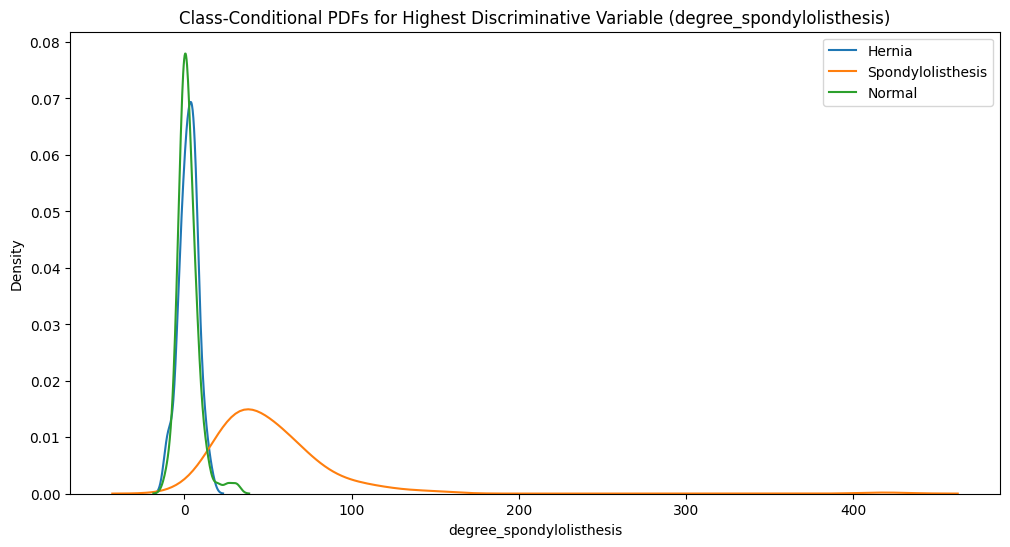

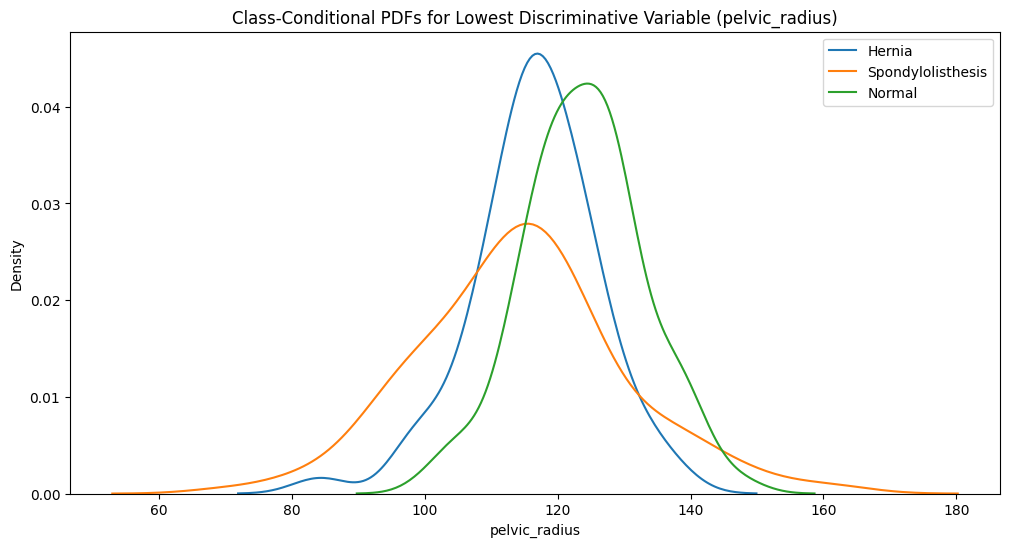

In [14]:
import seaborn as sns
# Compute F-scores and p-values for each feature
f_scores, p_values = f_classif(X, y)

# Find the index of the input variable with the highest and lowest F-scores
highest_discriminative_index = f_scores.argmax()
lowest_discriminative_index = f_scores.argmin()

# Plot class-conditional PDFs for the highest and lowest discriminative variables
plt.figure(figsize=(12, 6))
for class_name in df['class'].unique():
    sns.kdeplot(X[y == class_name].iloc[:, highest_discriminative_index], label=class_name)
plt.title(f'Class-Conditional PDFs for Highest Discriminative Variable ({X.columns[highest_discriminative_index]})')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for class_name in df['class'].unique():
    sns.kdeplot(X[y == class_name].iloc[:, lowest_discriminative_index], label=class_name)
plt.title(f'Class-Conditional PDFs for Lowest Discriminative Variable ({X.columns[lowest_discriminative_index]})')
plt.legend()
plt.show()

### 2) 

Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a
single plot both the training and testing accuracies of a decision tree with depth limits in
{1,2,3,4,5,6,8,10} and the remaining parameters as default.
[optional] Note that split thresholding of numeric variables in decision trees is non-deterministic
in sklearn, hence you may opt to average the results using 10 runs per parameterization.

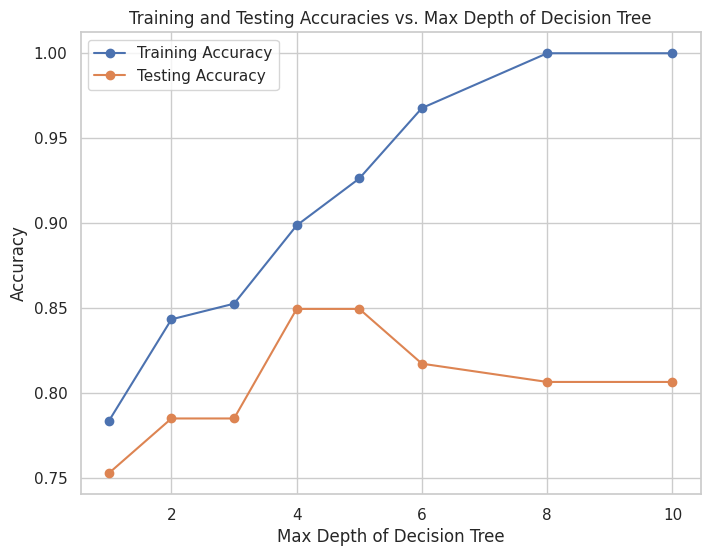

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

random_seed = 0
np.random.seed(random_seed)
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

train_accuracies = []
test_accuracies = []
for depth in depth_limits:
    # Create and fit a Decision Tree Classifier with the specified depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    # Predict on training and testing data
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(8, 6))
plt.plot(depth_limits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_limits, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. Max Depth of Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

### 3) Comment on the results
Comment on the results, including the generalization capacity across settings.

### 4) 
To deploy the predictor, a healthcare team opted to learn a single decision tree
(random_state=0) using all available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.
i. Plot the decision tree.
ii. Characterize a hernia condition by identifying the hernia-conditional associations.

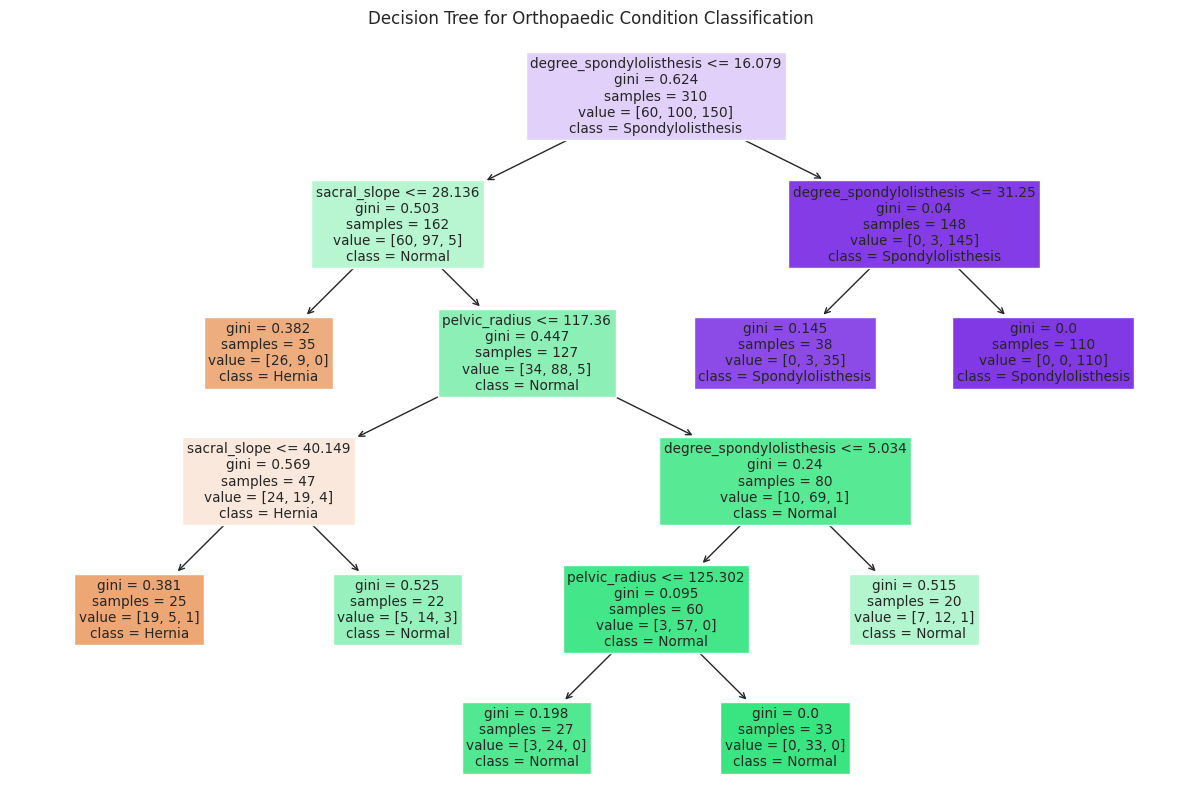

In [17]:
from sklearn.tree import plot_tree

# Create a Decision Tree Classifier with a max depth that ensures at least 20 individuals in each leaf
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.title("Decision Tree for Orthopaedic Condition Classification")
plt.show()


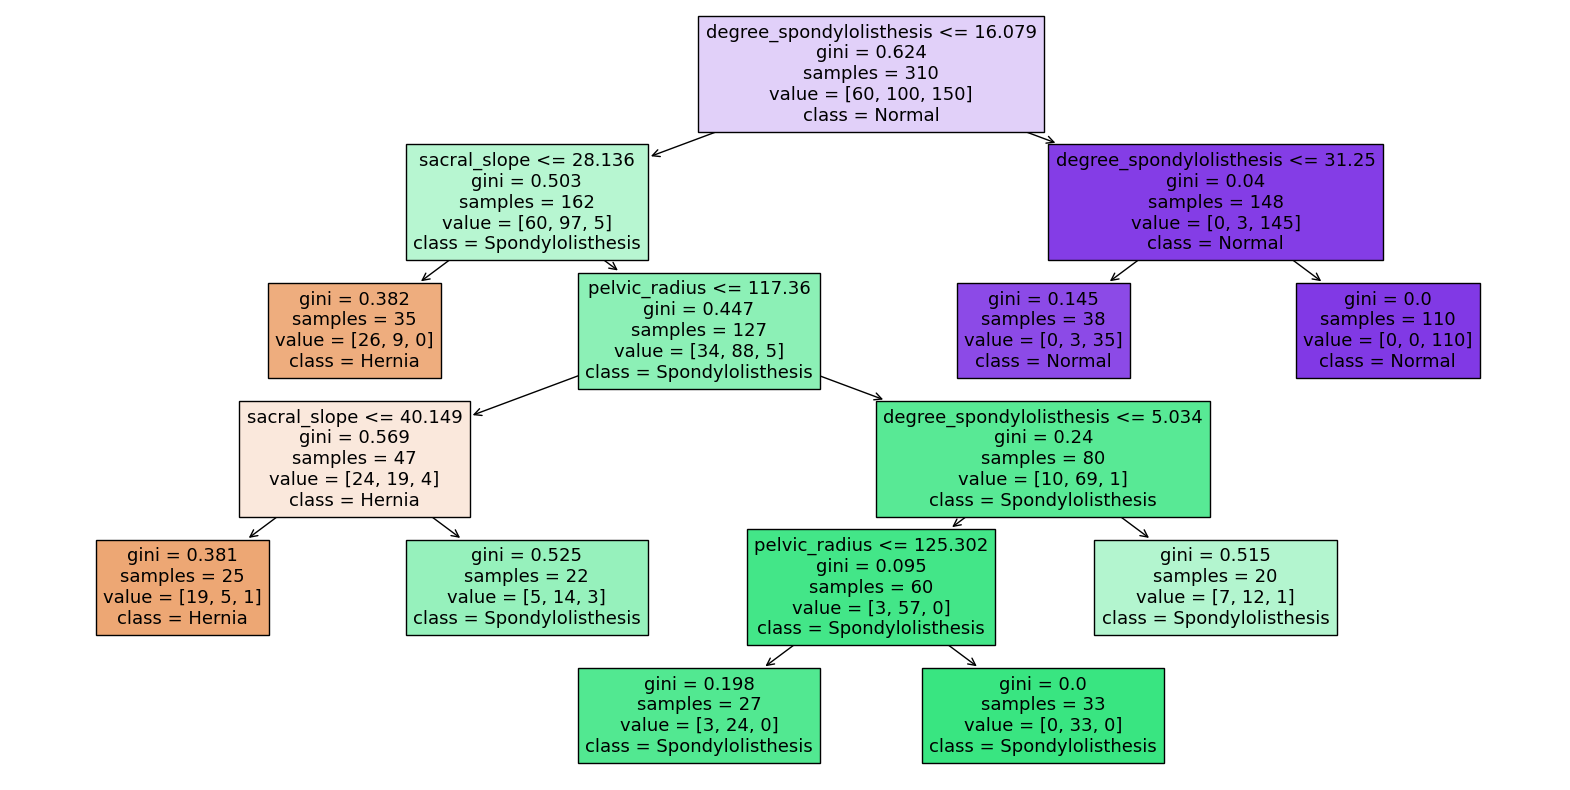

In [16]:
from sklearn.tree import plot_tree

# Train a single decision tree with specific parameters
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_leaf=20, random_state=0)
dt_classifier.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=df['class'].unique())
plt.show()

# Characterize hernia-conditional associations
# You can manually analyze the tree or use tree interpreter libraries to extract rules.
# Example: https://github.com/andosa/treeinterpreter
